In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [2]:
# Replace 'your_dataset.csv' with the actual path to your dataset
data = pd.read_csv('/content/sample_data/Mall_Customers.csv')

# Display the first few rows of the dataset
print(data.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [3]:
# Select relevant features for clustering (e.g., 'Age', 'Annual Income (k$)', 'Spending Score (1-100)')
features = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Check for missing values
print(features.isnull().sum())

# Handle missing values if any (fill with mean or drop)
features = features.fillna(features.mean())


Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [4]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


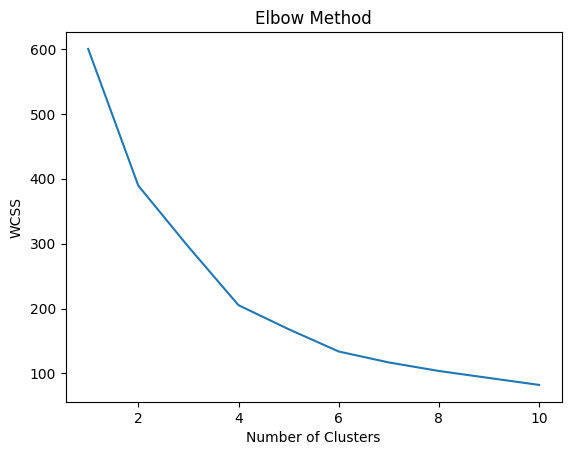

In [5]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [6]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add cluster labels to the original data
data['Cluster'] = clusters
print(data.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        0  
1        0  
2        0  
3        0  
4        0  


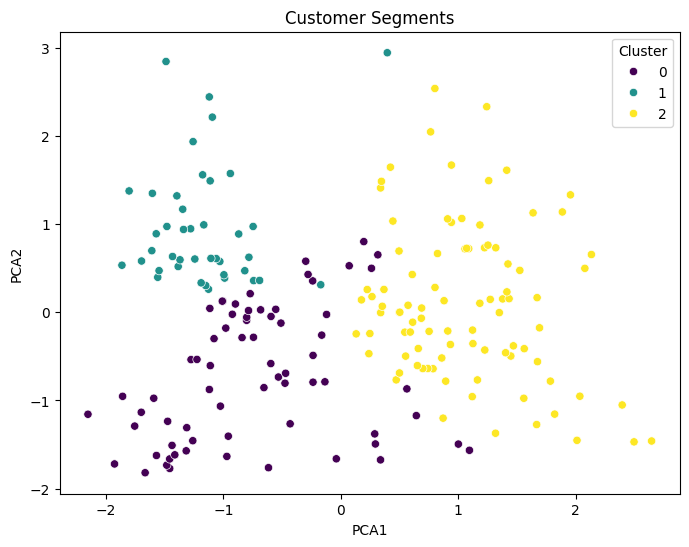

In [7]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)
pca_data = pd.DataFrame(data=principal_components, columns=['PCA1', 'PCA2'])
pca_data['Cluster'] = clusters

# Plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_data, palette='viridis')
plt.title('Customer Segments')
plt.show()


In [8]:
data.to_csv('clustered_customers.csv', index=False)
